<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Postgres SQL Lab


---
We are going to continue working on the northwind database:


<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#1.-Inspect-the-database" data-toc-modified-id="1.-Inspect-the-database-0.1">1. Inspect the database</a></span></li><li><span><a href="#2.-Print-schemas" data-toc-modified-id="2.-Print-schemas-0.2">2. Print schemas</a></span></li><li><span><a href="#3.-Table-peek" data-toc-modified-id="3.-Table-peek-0.3">3. Table peek</a></span></li></ul></li><li><span><a href="#4.-Investigating-products" data-toc-modified-id="4.-Investigating-products-1">4. Investigating products</a></span><ul class="toc-item"><li><span><a href="#4.1-What-categories-of-products-is-the-company-selling?" data-toc-modified-id="4.1-What-categories-of-products-is-the-company-selling?-1.1">4.1 What categories of products is the company selling?</a></span></li><li><span><a href="#4.2-How-many-products-per-category-does-the-catalog-contain?" data-toc-modified-id="4.2-How-many-products-per-category-does-the-catalog-contain?-1.2">4.2 How many products per category does the catalog contain?</a></span></li><li><span><a href="#4.3-How-many-not-discontinued-products-are-there-per-category?" data-toc-modified-id="4.3-How-many-not-discontinued-products-are-there-per-category?-1.3">4.3 How many <em>not discontinued</em> products are there per category?</a></span></li><li><span><a href="#4.4-What-are-the-top-five-most-expensive-products-(not-discontinued)?" data-toc-modified-id="4.4-What-are-the-top-five-most-expensive-products-(not-discontinued)?-1.4">4.4 What are the top five most expensive products (not discontinued)?</a></span></li><li><span><a href="#4.5-How-many-units-of-each-of-these-5-products-are-there-in-stock?" data-toc-modified-id="4.5-How-many-units-of-each-of-these-5-products-are-there-in-stock?-1.5">4.5 How many units of each of these 5 products are there in stock?</a></span></li><li><span><a href="#4.6-Use-pandas-to-make-a-useful-bar-chart-of-the-product-data." data-toc-modified-id="4.6-Use-pandas-to-make-a-useful-bar-chart-of-the-product-data.-1.6">4.6 Use pandas to make a useful bar chart of the product data.</a></span></li></ul></li><li><span><a href="#5.-Investigating-orders" data-toc-modified-id="5.-Investigating-orders-2">5. Investigating orders</a></span><ul class="toc-item"><li><span><a href="#5.1-How-many-orders-in-total?" data-toc-modified-id="5.1-How-many-orders-in-total?-2.1">5.1 How many orders in total?</a></span></li><li><span><a href="#5.2-How-many-orders-per-year?" data-toc-modified-id="5.2-How-many-orders-per-year?-2.2">5.2 How many orders per year?</a></span></li><li><span><a href="#5.3-How-many-orders-per-quarter?" data-toc-modified-id="5.3-How-many-orders-per-quarter?-2.3">5.3 How many orders per quarter?</a></span></li><li><span><a href="#5.4-Which-country-is-receiving-the-most-orders?" data-toc-modified-id="5.4-Which-country-is-receiving-the-most-orders?-2.4">5.4 Which country is receiving the most orders?</a></span></li><li><span><a href="#5.5-Which-country-is-receiving-the-least?" data-toc-modified-id="5.5-Which-country-is-receiving-the-least?-2.5">5.5 Which country is receiving the least?</a></span></li><li><span><a href="#5.6-What's-the-average-shipping-time-(ShippedDate---OrderDate)?" data-toc-modified-id="5.6-What's-the-average-shipping-time-(ShippedDate---OrderDate)?-2.6">5.6 What's the average shipping time (ShippedDate - OrderDate)?</a></span></li><li><span><a href="#5.7-What-customer-is-submitting-the-highest-number-of-orders?" data-toc-modified-id="5.7-What-customer-is-submitting-the-highest-number-of-orders?-2.7">5.7 What customer is submitting the highest number of orders?</a></span></li><li><span><a href="#5.8-What-customer-is-generating-the-highest-revenue?" data-toc-modified-id="5.8-What-customer-is-generating-the-highest-revenue?-2.8">5.8 What customer is generating the highest revenue?</a></span></li><li><span><a href="#5.9-[Challenge]-What-fraction-of-the-revenue-is-generated-by-the-top-5-customers?" data-toc-modified-id="5.9-[Challenge]-What-fraction-of-the-revenue-is-generated-by-the-top-5-customers?-2.9">5.9 [Challenge] What fraction of the revenue is generated by the top 5 customers?</a></span></li></ul></li></ul></div>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format = 'retina'
sns.set(font_scale=1.5)

In [2]:
import psycopg2

# DSN (data source name) format for database connections:  
# [protocol / database  name]://[username]:[password]@[hostname / ip]:[port]/[database name here]


# on your computer you are the user postgres (full administrative access)
db_user = 'postgres'
# if you need a password to access a database, put it here
db_password = ''
# on your computer, use localhost
db_host = 'localhost'
# the default port for postgres is 5432
db_port = 5432
# we want to connect to the northwind database
database = 'northwind'

conn_str = f'postgresql://{db_user}:{db_password}@{db_host}:{db_port}/{database}'
conn = psycopg2.connect(conn_str)

**And generate dataframes from string queries using pandas `.read_sql` like so:**

In [3]:
pd.read_sql("SELECT tablename FROM pg_catalog.pg_tables WHERE schemaname='public'", con=conn)

,tablename
0,customer_customer_demo
1,suppliers
2,shippers
3,customer_demographics
4,territories
5,region
6,us_states
7,categories
8,employees
9,employee_territories


### 1. Inspect the database

If we were connected via console, it would be easy to list all tables using `\dt`. We can also access table information by running a query on the `information_schema.tables` table.

**Write a `SELECT` statement that lists all the tables in the public schema of the `northwind` database, sorted alphabetically.**

```*.sql
SELECT tablename 
FROM pg_catalog.pg_tables 
WHERE schemaname='public'
```

In [4]:
# A:
query = """
SELECT tablename 
FROM pg_catalog.pg_tables 
WHERE schemaname='public'
"""

pd.read_sql(query, con=conn)

,tablename
0,customer_customer_demo
1,suppliers
2,shippers
3,customer_demographics
4,territories
5,region
6,us_states
7,categories
8,employees
9,employee_territories


### 2. Print schemas

The table `information_schema.columns` contains schema information on each schema.

Query it to display schemas of all the public tables. In particular we are interested in the column names and data types. Make sure you only include public schemas to avoid cluttering your results with a bunch of postgres related stuff.

Specifically, select columns `table_name`, `data_type`, and `table_schema` from the table only where `table_schema` is "public".

In [5]:
# A:
query = """
SELECT table_name, column_name, data_type, table_schema
FROM information_schema.columns
WHERE table_schema = 'public'
order by table_name
"""

pd.read_sql(query, con=conn).head()

,table_name,column_name,data_type,table_schema
0,categories,description,text,public
1,categories,category_name,character varying,public
2,categories,category_id,smallint,public
3,categories,picture,bytea,public
4,customer_customer_demo,customer_id,character,public


### 3. Table peek

Another way of quickly looking at table information is to query the first few rows. Do this for a table or two, for example: `orders`, `products`, `us_states`. 

Display only the first 3 rows.

In [6]:
# A:
query = """
SELECT *
FROM orders
LIMIT 3
"""

pd.read_sql(query, con=conn)

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany
2,10250,HANAR,4,1996-07-08,1996-08-05,1996-07-12,2,65.83,Hanari Carnes,"Rua do Paço, 67",Rio de Janeiro,RJ,05454-876,Brazil


In [7]:
query = """
SELECT *
FROM products
LIMIT 3
"""

pd.read_sql(query, con=conn)

,product_id,product_name,supplier_id,category_id,quantity_per_unit,unit_price,units_in_stock,units_on_order,reorder_level,discontinued
0,1,Chai,8,1,10 boxes x 30 bags,18.0,39,0,10,1
1,2,Chang,1,1,24 - 12 oz bottles,19.0,17,40,25,1
2,3,Aniseed Syrup,1,2,12 - 550 ml bottles,10.0,13,70,25,0


In [8]:
query = """
SELECT *
FROM us_states
LIMIT 3
"""

pd.read_sql(query, con=conn)

,state_id,state_name,state_abbr,state_region
0,1,Alabama,AL,south
1,2,Alaska,AK,north
2,3,Arizona,AZ,west


> Some tables (like `us_states` or `region`) contain information that is probably less prone to change than other tables (like `orders` or `order_details`). This database is well organized to avoid unnecessary duplication. Let's start digging deeper in the data.

## 4. Investigating products

---

What products is this company selling? The `products` and `categories` tables contain information to answer this question.

We will use a combination of SQL queries and Pandas to answer the following questions:

1. What categories of products is the company selling?
- How many products per category does the catalog contain?
- Let's focus only on products that have not been discontinued => how many products per category?
- What are the most expensive 5 products (not discontinued)?
- How many units of each of these 5 products are there in stock?
- Construct a bar chart of the data with pandas.

### 4.1 What categories of products is the company selling?

> Remember that PostgreSQL is case sensitive.

In [9]:
query = 'SELECT * FROM categories'

pd.read_sql(query, con=conn)

,category_id,category_name,description,picture
0,1,Beverages,"Soft drinks, coffees, teas, beers, and ales",[]
1,2,Condiments,"Sweet and savory sauces, relishes, spreads, an...",[]
2,3,Confections,"Desserts, candies, and sweet breads",[]
3,4,Dairy Products,Cheeses,[]
4,5,Grains/Cereals,"Breads, crackers, pasta, and cereal",[]
5,6,Meat/Poultry,Prepared meats,[]
6,7,Produce,Dried fruit and bean curd,[]
7,8,Seafood,Seaweed and fish,[]


In [10]:
# A:
query = 'SELECT DISTINCT category_name FROM categories'

pd.read_sql(query, con=conn)

,category_name
0,Beverages
1,Produce
2,Seafood
3,Grains/Cereals
4,Confections
5,Meat/Poultry
6,Condiments
7,Dairy Products


### 4.2 How many products per category does the catalog contain?


In [11]:
# A:
query = """
SELECT c.category_name, COUNT(p.product_id) AS ProdsPerCat
FROM categories c
INNER JOIN products p
ON p.category_id = c.category_id
GROUP BY c.category_name
"""

pd.read_sql(query, con=conn)

,category_name,prodspercat
0,Beverages,12
1,Seafood,12
2,Grains/Cereals,7
3,Confections,13
4,Meat/Poultry,6
5,Condiments,12
6,Dairy Products,10
7,Produce,5


### 4.3 How many _not discontinued_ products are there per category?

In [12]:
# A:
query = """
SELECT c.category_name, COUNT(p.product_id) AS ProdsPerCat
FROM categories c
INNER JOIN products p
ON p.category_id = c.category_id
WHERE p.discontinued=0
GROUP BY c.category_name
"""

pd.read_sql(query, con=conn)

,category_name,prodspercat
0,Beverages,9
1,Seafood,12
2,Grains/Cereals,6
3,Confections,13
4,Meat/Poultry,2
5,Condiments,11
6,Dairy Products,10
7,Produce,4


### 4.4 What are the top five most expensive products (not discontinued)?

In [13]:
# A:
query = """
SELECT p.product_name, p.unit_price
FROM products p
WHERE p.discontinued=0
ORDER BY p.unit_price DESC
LIMIT 5
"""

pd.read_sql(query, con=conn)

,product_name,unit_price
0,Côte de Blaye,263.5
1,Sir Rodney's Marmalade,81.0
2,Carnarvon Tigers,62.5
3,Raclette Courdavault,55.0
4,Manjimup Dried Apples,53.0


### 4.5 How many units of each of these 5 products are there in stock?

In [14]:
# A:
query = """
SELECT p.product_name, p.units_in_stock
FROM products p
WHERE p.discontinued=0
ORDER BY p.unit_price DESC
LIMIT 5
"""

data = pd.read_sql(query, con=conn)
data

,product_name,units_in_stock
0,Côte de Blaye,17
1,Sir Rodney's Marmalade,40
2,Carnarvon Tigers,42
3,Raclette Courdavault,79
4,Manjimup Dried Apples,20


### 4.6 Use pandas to make a useful bar chart of the product data.

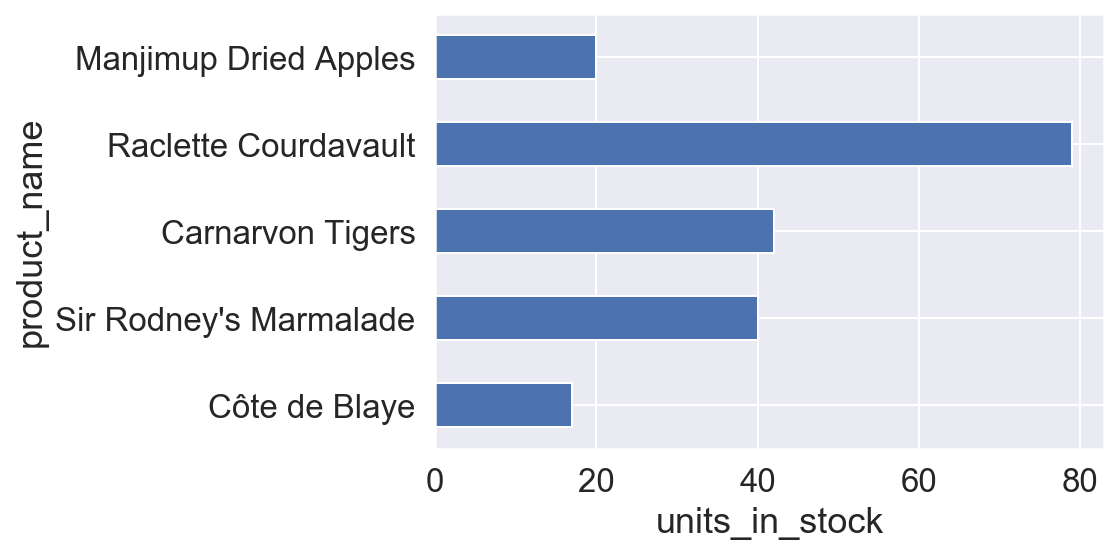

In [15]:
# A:
data.plot('product_name', 'units_in_stock', kind='barh', legend=False)
plt.xlabel('units_in_stock');

## 5. Investigating orders

---

Now that we have a better understanding of products, let's start digging into orders.

1. How many orders are there in total?
- How many orders per year?
- How many orders per quarter?
- Which country is receiving the most orders?
- Which country is receiving the least?
- What's the average shipping time (shipped_date - order_date)?
- What customer is submitting the highest number of orders?
- What customer is generating the highest revenue (need to pd.merge with order_details)?
- [Challenge] What fraction of the revenue is generated by the top 5 customers?

### 5.1 How many orders in total?

In [16]:
# A:
query = """
SELECT COUNT(*) AS num_orders
FROM orders o
"""

pd.read_sql(query, con=conn)

,num_orders
0,830


### 5.2 How many orders per year?  
The SQL [`Extract`](https://www.tutorialspoint.com/sql/sql-date-functions.htm#function_extract) function will be useful here.

In [17]:
query = """
SELECT *
FROM orders o
LIMIT 2
"""

pd.read_sql(query, con=conn)

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France
1,10249,TOMSP,6,1996-07-05,1996-08-16,1996-07-10,1,11.61,Toms Spezialitäten,Luisenstr. 48,Münster,None,44087,Germany


In [18]:
# A:
query = """
SELECT CAST(EXTRACT(YEAR FROM o.order_date) AS INT) AS year, COUNT(*) AS num_orders
FROM orders o
GROUP BY year
ORDER BY year
"""

pd.read_sql(query, con=conn)

,year,num_orders
0,1996,152
1,1997,408
2,1998,270


In [19]:
# A:
query = """
SELECT CAST(date_part('year', o.order_date) AS INT) AS year, COUNT(*) AS num_orders
FROM orders o
GROUP BY year
ORDER BY year
"""

pd.read_sql(query, con=conn)

,year,num_orders
0,1996,152
1,1997,408
2,1998,270


### 5.3 How many orders per quarter?

Make a line plot of this data as well.

In [20]:
# A:
query = """
SELECT CAST(EXTRACT(YEAR FROM o.order_date) AS INT) AS year, 
CAST(EXTRACT(QUARTER FROM o.order_date) AS INT) AS quarter, 
COUNT(*) AS num_orders
FROM orders o
GROUP BY year, quarter
ORDER BY year, quarter
"""

orders_per_quarter = pd.read_sql(query, con=conn)
orders_per_quarter

,year,quarter,num_orders
0,1996,3,70
1,1996,4,82
2,1997,1,92
3,1997,2,93
4,1997,3,103
5,1997,4,120
6,1998,1,182
7,1998,2,88


Here is another shorthand for casting the dates as integers..

```*.sql
    EXTRACT(year FROM "OrderDate"):: INT AS year, 
    EXTRACT(quarter FROM "OrderDate"):: INT AS quarter 
```

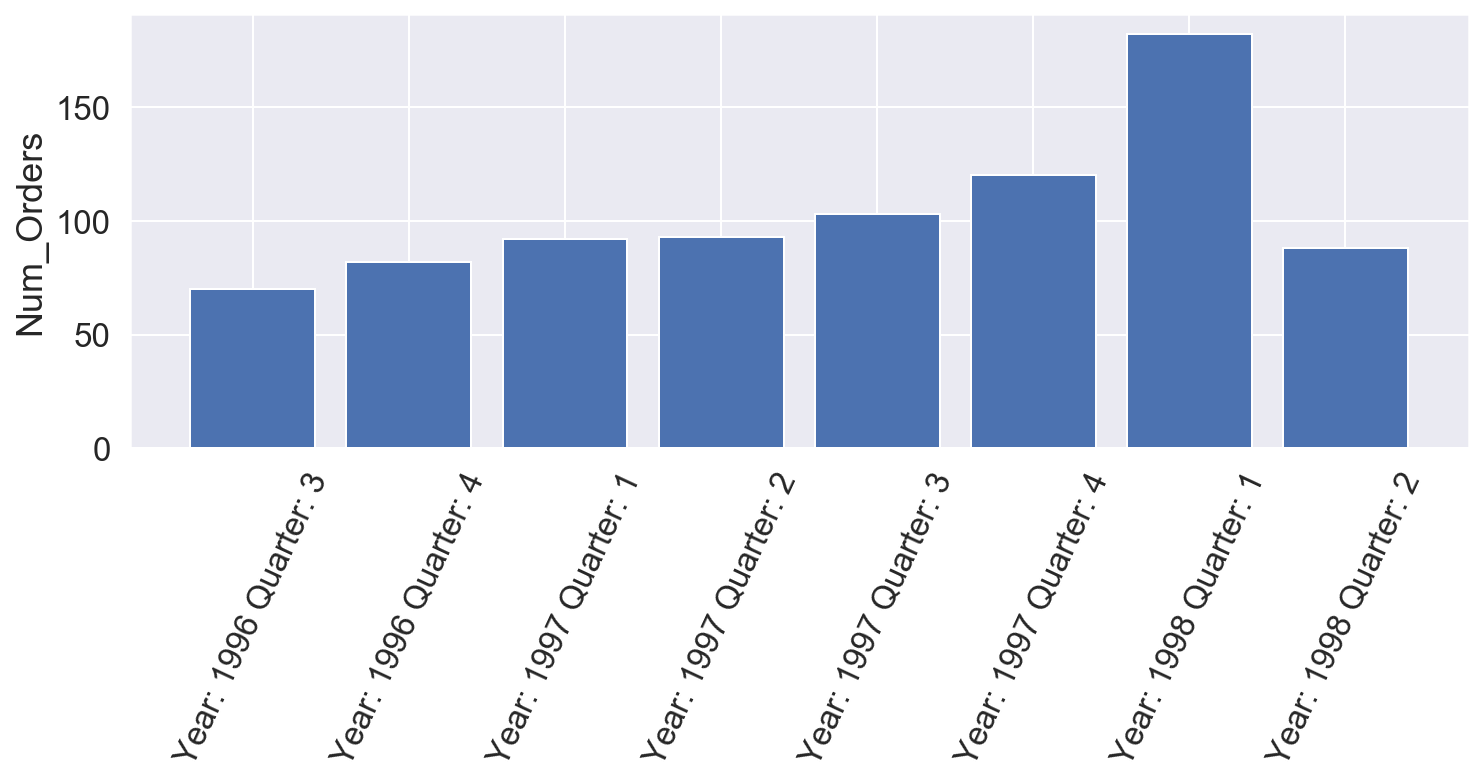

In [21]:
# A:
fig, ax = plt.subplots(figsize=(12,4))
ax.bar(pd.Series([str(y) for y in orders_per_quarter['year']]) +
        pd.Series([str(q) for q in orders_per_quarter['quarter']]),
        orders_per_quarter['num_orders'])
ax.set_xticklabels('Year: ' + pd.Series([str(y) for y in orders_per_quarter['year']]) +
                   ' Quarter: ' + pd.Series([str(q) for q in orders_per_quarter['quarter']]),
                   rotation=65)
ax.set_ylabel('Num_Orders')
plt.show()

### 5.4 Which country is receiving the most orders?

In [22]:
# A:
query = """
SELECT o.ship_country,
COUNT(*) AS num_orders
FROM orders o
GROUP BY o.ship_country
ORDER BY num_orders DESC
LIMIT 1
"""

pd.read_sql(query, con=conn)

,ship_country,num_orders
0,Germany,122


### 5.5 Which country is receiving the least?

In [23]:
# A:
query = """
SELECT o.ship_country,
COUNT(*) AS num_orders
FROM orders o
GROUP BY o.ship_country
ORDER BY num_orders ASC
LIMIT 1
"""

pd.read_sql(query, con=conn)

,ship_country,num_orders
0,Norway,6


### 5.6 What's the average shipping time (ShippedDate - OrderDate)?

In [24]:
# A:
query = """
SELECT AVG(o.shipped_date-o.order_date) AS "Avg_Shipping_Time"
FROM orders o
"""

pd.read_sql(query, con=conn)

,Avg_Shipping_Time
0,8.491965


### 5.7 What customer is submitting the highest number of orders?

In [25]:
query = """
SELECT *
FROM orders o
LIMIT 1
"""

pd.read_sql(query, con=conn)

,order_id,customer_id,employee_id,order_date,required_date,shipped_date,ship_via,freight,ship_name,ship_address,ship_city,ship_region,ship_postal_code,ship_country
0,10248,VINET,5,1996-07-04,1996-08-01,1996-07-16,3,32.38,Vins et alcools Chevalier,59 rue de l'Abbaye,Reims,None,51100,France


In [26]:
query = """
SELECT *
FROM order_details od
LIMIT 1
"""

pd.read_sql(query, con=conn)

,order_id,product_id,unit_price,quantity,discount
0,10248,11,14.0,12,0.0


In [27]:
# A:
query = """
SELECT o.customer_id,
COUNT(*) AS num_orders
FROM orders o
GROUP BY o.customer_id
ORDER BY num_orders DESC
LIMIT 1
"""

pd.read_sql(query, con=conn)

,customer_id,num_orders
0,SAVEA,31


### 5.8 What customer is generating the highest revenue?

> Hint: You will need to join `orders` with `order_details`. And don't forget the discount column!

In [28]:
# A:
query = """
SELECT o.customer_id, SUM(od.unit_price*(1-od.discount)*od.quantity) AS revenue
FROM orders o
INNER JOIN order_details od
ON od.order_id=o.order_id
GROUP BY o.customer_id
ORDER BY revenue DESC
LIMIT 1
"""

pd.read_sql(query, con=conn)

,customer_id,revenue
0,QUICK,110277.30503


### 5.9 [Challenge] What fraction of the revenue is generated by the top 5 customers?

In [29]:
query = """
SELECT SUM(od.unit_price*od.quantity-od.discount) 
FROM order_details od
"""

pd.read_sql(query, con=conn)

,sum
0,1.354338e+06


In [30]:
query = """
SELECT o.customer_id, SUM(od.unit_price*od.quantity-od.discount) AS revenue
FROM orders o
INNER JOIN order_details od
ON od.order_id=o.order_id
GROUP BY o.customer_id
ORDER BY revenue DESC
LIMIT 5
"""

pd.read_sql(query, con=conn)

,customer_id,revenue
0,QUICK,117477.440148
1,SAVEA,115663.789643
2,ERNSH,113229.729782
3,HUNGO,57311.140162
4,RATTC,52243.410347


In [31]:
query = """
SELECT SUM(sq.revenue)
FROM
(SELECT o.customer_id, SUM(od.unit_price*od.quantity-od.discount) AS revenue
FROM orders o
INNER JOIN order_details od
ON od.order_id=o.order_id
GROUP BY o.customer_id
ORDER BY revenue DESC
LIMIT 5) sq
"""

pd.read_sql(query, con=conn)

,sum
0,455925.510081


In [32]:
query = """
SELECT SUM(sq.revenue)/
(SELECT SUM(od.unit_price*od.quantity-od.discount) FROM order_details od) 
AS TOP_5_Proportion_of_Revenue
FROM
(SELECT o.customer_id, SUM(od.unit_price*od.quantity-od.discount) AS revenue
FROM orders o
INNER JOIN order_details od
ON od.order_id=o.order_id
GROUP BY o.customer_id
ORDER BY revenue DESC
LIMIT 5) sq
"""

pd.read_sql(query, con=conn)

,top_5_proportion_of_revenue
0,0.336641
